# Projeto: Bank Marketing

Fonte dos dados: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [7]:
# pacotes necessários
library(tidyverse)

In [8]:
# carregando os dataset
df <- read.csv(file = "bank-full.csv", sep = ";")

# verificando a estrutura do dataset
str(df)

'data.frame':	45211 obs. of  17 variables:
 $ age      : int  58 44 33 47 33 35 28 42 58 43 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 5 10 3 2 12 5 5 3 6 10 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 2 3 2 2 3 2 3 1 2 3 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 3 2 2 4 4 3 3 3 1 2 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 2 1 1 ...
 $ balance  : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing  : Factor w/ 2 levels "no","yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 2 1 1 1 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ day      : int  5 5 5 5 5 5 5 5 5 5 ...
 $ month    : Factor w/ 12 levels "apr","aug","dec",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ duration : int  261 151 76 92 198 139 217 380 50 55 ...
 $ campaign : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : int  0 0 0

 ## 1) Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?

In [9]:
# tabela de contingência
tab1 <- with(df, table(df$job, df$loan))
tab1[order(tab1[,2], decreasing = TRUE),]

               
                  no  yes
  blue-collar   8048 1684
  technician    6288 1309
  management    8205 1253
  admin.        4180  991
  services      3318  836
  entrepreneur  1131  356
  retired       1955  309
  self-employed 1350  229
  housemaid     1088  152
  unemployed    1194  109
  student        926   12
  unknown        284    4

### R: operários são os que mais pedem empréstimos!  

## 2) Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?


In [10]:
# explorando a variável campaign
unique(df$campaign)

[1]  1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21 43
[26] 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44

In [11]:
# explorando a variável poutcome 
unique(df$poutcome)

[1] unknown failure other   success
Levels: failure other success unknown

In [12]:
# tabela de contingência
tab2 <- table(df$poutcome, df$campaign)
tab2

         
              1     2     3     4     5     6     7     8     9    10    11
  failure  2458  1374   500   242   140    87    52    22    10     6     4
  other     718   500   262   131    86    55    34    24    13     4     7
  success   837   402   149    51    30    21    11     8     1     0     1
  unknown 13531 10229  4610  3098  1508  1128   638   486   303   256   189
         
             12    13    14    15    16    17    18    19    20    21    22
  failure     3     1     1     1     0     0     0     0     0     0     0
  other       4     1     0     0     1     0     0     0     0     0     0
  success     0     0     0     0     0     0     0     0     0     0     0
  unknown   148   131    92    83    78    69    51    44    43    35    23
         
             23    24    25    26    27    28    29    30    31    32    33
  failure     0     0     0     0     0     0     0     0     0     0     0
  other       0     0     0     0     0     0     0     0 

In [13]:
# soma de tentativas por tipo de resultado da campanha
rowSums(tab2)

failure   other success unknown 
   4901    1840    1511   36959

In [14]:
# preparando os dados para verificação do número de tentativas X frequência
df2 <- as.data.frame(tab2[3,])
df2 <- add_rownames(df2, "VALUE")

# verificando a estrutura dos dados
str(df2)

Warning message:
"Deprecated, use tibble::rownames_to_column() instead."

Classes 'tbl_df', 'tbl' and 'data.frame':	48 obs. of  2 variables:
 $ VALUE    : chr  "1" "2" "3" "4" ...
 $ tab2[3, ]: int  837 402 149 51 30 21 11 8 1 0 ...


In [15]:
# alterando a tipagem da coluna VALUE para número pois está como texto
df2$VALUE <- as.integer(df2$VALUE)

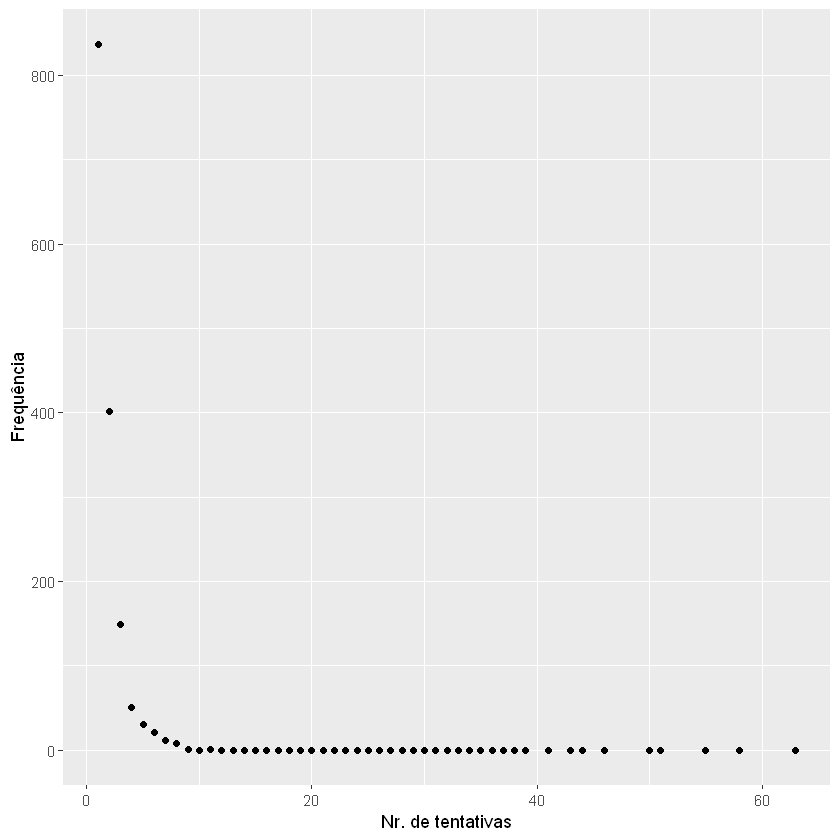

In [16]:
# vizualizando a relação entre número de tentativas e frequência
ggplot(df2, aes(x = VALUE, y = tab2[3, ])) +
    geom_point() +
    xlab("Nr. de tentativas") +
    ylab("Frequência")

### R: Pelo gráfico de dispersão é possível visualizar que após aproximadamente 10 tentativas é irrelevante tentar entrar em contato com o cliente.

## 3) Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?

In [17]:
# alterando o nome da coluna de frequência
colnames(df2)[2] <- "Freq"

# filtrando frequência diferente de zero
df3 <- filter(df2, df2$Freq > 1)

# visualizando as frequências por número de tentativas
df3

VALUE,Freq
1,837
2,402
3,149
4,51
5,30
6,21
7,11
8,8


In [18]:
# media do número de tentativas
round(mean(df3$VALUE), digits = 0)

[1] 4

In [19]:
# número máximo de tentativas
max(df3$VALUE)

[1] 8

### R: Portanto o número médio de tentativas sugerido é de 4, e o número máximo é de 8 tentativas.

## 4) O resultado da campanha anterior tem relevância na campanha atual?

In [69]:
# o teste com Chi-quadrado pode evidenciar a resposta dessa questão
chisq.test(table(df$poutcome, df$y))


	Pearson's Chi-squared test

data:  table(df$poutcome, df$y)
X-squared = 4391.5, df = 3, p-value < 2.2e-16


### R: O p-valor indica que há uma probabilidade alta de que exista alguma dependencia entre as variáveis em questão. Portanto, rejeitamos a hipótese nula (no qual as duas variáveis são independentes).

## 5)  Qual o fator determinante para que o banco exija um seguro de crédito?

In [58]:
# selecionando as features para inferir a feature determinante para exigir seguro de crédito 
df_lr5 <- df %>%
    select("age", "job", "marital", "education", "default", "housing", "loan", "y")

# verificando o dataset
head(df_lr5)

age,job,marital,education,default,housing,loan,y
58,management,married,tertiary,no,yes,no,no
44,technician,single,secondary,no,yes,no,no
33,entrepreneur,married,secondary,no,yes,yes,no
47,blue-collar,married,unknown,no,yes,no,no
33,unknown,single,unknown,no,no,no,no
35,management,married,tertiary,no,yes,no,no


In [59]:
# convertendo a variável dependente para binário
df_lr5$y <- ifelse(df_lr5$y == "no", 0, 1)

# verificando a conversão para binário
unique(df_lr5$y)

[1] 0 1

In [65]:
# modelo de regressão logística
model5 <- glm(y ~ ., data = df_lr5, family = "binomial")

# verificando o modelo
summary(model5)


Call:
glm(formula = y ~ ., family = "binomial", data = df_lr5)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0432  -0.5345  -0.4303  -0.3409   2.8394  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.954101   0.117932 -16.570  < 2e-16 ***
age                 0.004984   0.001806   2.760 0.005774 ** 
jobblue-collar     -0.338423   0.060887  -5.558 2.73e-08 ***
jobentrepreneur    -0.469236   0.106289  -4.415 1.01e-05 ***
jobhousemaid       -0.473978   0.112904  -4.198 2.69e-05 ***
jobmanagement      -0.181293   0.060775  -2.983 0.002854 ** 
jobretired          0.511337   0.077600   6.589 4.42e-11 ***
jobself-employed   -0.257666   0.092238  -2.794 0.005214 ** 
jobservices        -0.265172   0.069990  -3.789 0.000151 ***
jobstudent          0.573707   0.089680   6.397 1.58e-10 ***
jobtechnician      -0.234748   0.057290  -4.098 4.18e-05 ***
jobunemployed       0.084277   0.089613   0.940 0.346987    
jobunknown    

In [66]:
# obtendo a razão de chances das features para inferir quais indicam o cliente exigir um seguro de crédito
df5 <- as.data.frame(exp(coefficients(model5)))
df5 <- add_rownames(df5, "VALUE")

# alterando nome das colunas
colnames(df5)[1] <- "feature"
colnames(df5)[2] <- "odds_ratio"

# removendo o intercepto
df5 <- df5[-1,]

Warning message:
"Deprecated, use tibble::rownames_to_column() instead."

### R: Como pode ser visto a seguir, a feature determinante para o cliente exigir um seguro de crédito é se ele é estudante.

In [67]:
# ordenando 
df5[order(df5$odds_ratio, decreasing = TRUE),]

feature,odds_ratio
jobstudent,1.7748339
educationtertiary,1.6864314
jobretired,1.6675185
educationunknown,1.3091102
maritalsingle,1.2675870
educationsecondary,1.2631276
jobunemployed,1.0879299
age,1.0049969
maritalmarried,0.8700177
jobmanagement,0.8341907


## 6) Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?

In [60]:
# selecionando as features para inferir se o cliente possui empréstimo imobiliário 
df_lr6 <- df %>%
    select("age", "job", "marital", "education", "default", "housing", "loan")

In [61]:
# convertendo a variável dependente para binário
df_lr6$housing <- ifelse(df_lr6$housing == "no", 0, 1)

# verificando a conversão para binário
unique(df_lr6$housing)

[1] 1 0

In [62]:
# modelo de regressão logística
model6 <- glm(housing ~ ., data = df_lr6, family = "binomial")

# verificando o modelo
summary(model6)


Call:
glm(formula = housing ~ ., family = "binomial", data = df_lr6)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.965  -1.173   0.715   1.017   2.477  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         2.310996   0.077255  29.914  < 2e-16 ***
age                -0.040350   0.001227 -32.897  < 2e-16 ***
jobblue-collar      0.496348   0.039006  12.725  < 2e-16 ***
jobentrepreneur     0.048932   0.062306   0.785 0.432250    
jobhousemaid       -1.019049   0.070274 -14.501  < 2e-16 ***
jobmanagement      -0.235973   0.041500  -5.686 1.30e-08 ***
jobretired         -0.984080   0.063779 -15.429  < 2e-16 ***
jobself-employed   -0.374721   0.060221  -6.222 4.90e-10 ***
jobservices         0.171713   0.044302   3.876 0.000106 ***
jobstudent         -1.704725   0.082221 -20.734  < 2e-16 ***
jobtechnician      -0.256462   0.037532  -6.833 8.31e-12 ***
jobunemployed      -0.722075   0.064423 -11.208  < 2e-16 ***
jobunknown        

In [63]:
# obtendo a razão de chances das features para inferir quais indicam o cliente ter empréstimo imobiliário
df6 <- as.data.frame(exp(coefficients(model6)))
df6 <- add_rownames(df6, "VALUE")

# alterando nome das colunas
colnames(df6)[1] <- "feature"
colnames(df6)[2] <- "odds_ratio"

# removendo o intercepto
df6 <- df6[-1,]

Warning message:
"Deprecated, use tibble::rownames_to_column() instead."

### R: Segue a relação em ordem decrescente da razão de chances das features que são preditivas do cliente ter empréstimo imobiliário, no qual são: clientes com emprego de operário (blue-collar job), com emprego na área de serviços, que são autônomos, que já possuem empréstimo pessoal e que possuem ensino fundamental completo.

In [64]:
# ordenando 
df6[order(df6$odds_ratio, decreasing = TRUE),]

feature,odds_ratio
jobblue-collar,1.64271142
jobservices,1.18733691
loanyes,1.09112493
jobentrepreneur,1.05014846
educationsecondary,1.04052624
age,0.96045294
maritalmarried,0.85851400
jobmanagement,0.78980171
jobtechnician,0.77378460
educationunknown,0.77176947
